## Assignment

In this assignment, you keep working with the __(Students Performance in Exams)[https://www.kaggle.com/spscientist/students-performance-in-exams/home]__ dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

- postgres_user = 'dsbc_student'
- postgres_pw = '7*.8G9QH21'
- postgres_host = '142.93.121.174'
- postgres_port = '5432'
- postgres_db = 'studentsperformance'

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?

### Import Statements

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

### Dataframe

In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [5]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


For this assignment, I'd agrue that the math, reading and writing scores are continuous variables and the other variables (gender, race/ethnicity ...) are categorical.

### 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [17]:
student_df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


Text(0.5, 1.0, 'Math Scores by Gender')

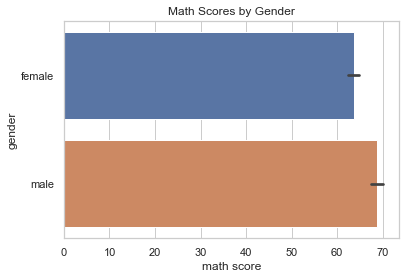

In [26]:
sns.barplot(student_df['math score'], student_df['gender'])
plt.title('Math Scores by Gender')

In [18]:
student_df.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


Text(0.5, 1.0, 'Math Scores by Race/Ethnicity')

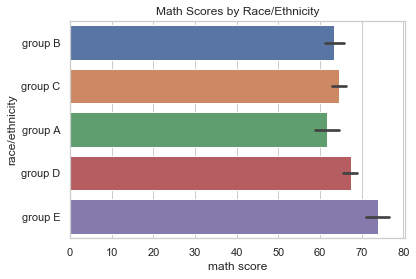

In [30]:
sns.barplot(student_df['math score'], student_df['race/ethnicity'])
plt.title('Math Scores by Race/Ethnicity')

In [19]:
student_df.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


Text(0.5, 1.0, 'Math Scores by Parental Level of Education')

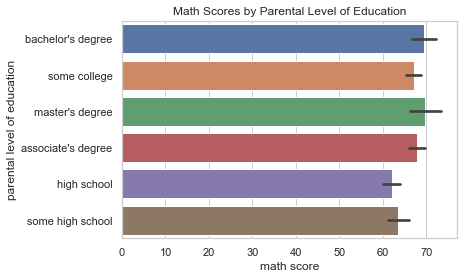

In [29]:
sns.barplot(student_df['math score'], student_df['parental level of education'])
plt.title('Math Scores by Parental Level of Education')

Yes, there are differences in test scores based off each students' gender, race/ethnicity and parental level of education.

I was surprised to see that a bachelor's vs. a master's degree didn't have much of an impact on test scores.

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [32]:
student_df.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


Students that get free/reduced lunches have lower test scores than students who get standard lunches. This could be because students that receive free/reduced lunches have parents that didn't achieve as high of education levels as the students that get standard lunches.

### 3. Does the test preparation course seem to have an effect on the exam performances?

In [36]:
student_df.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


Yes, students that completed the test preparation course had consistently higher scores than those that didn't finish the course.

### 4. Which 2 exam scores are most correlated with each other?

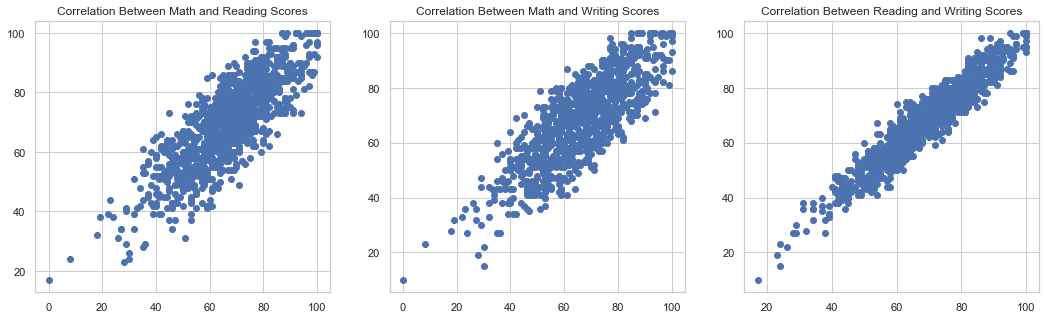

In [38]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(student_df['math score'], student_df['reading score'])
plt.title('Correlation Between Math and Reading Scores')

plt.subplot(1, 3, 2)
plt.scatter(student_df['math score'], student_df['writing score'])
plt.title('Correlation Between Math and Writing Scores')

plt.subplot(1, 3, 3)
plt.scatter(student_df['reading score'], student_df['writing score'])
plt.title('Correlation Between Reading and Writing Scores')

plt.show()

In [39]:
student_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


The reading and writing scores have the strongest correlation.